<a href="https://colab.research.google.com/github/kebabee/autoencoder-memory/blob/main/hopfield_capacity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

class hopfield_net:
    def __init__(self, num_of_neurons): # constructor
        self.num_of_neurons = num_of_neurons
        self.num_of_patterns = 0
        self.weights = np.random.uniform(-0.3,0.3,(num_of_neurons, num_of_neurons)) #weight matrix, random numbers on the beginning
        np.fill_diagonal(self.weights, 0) # w_ii = 0
        self.patterns = [] # vector with patterns

    def learn(self, patterns): # Hebb's learning
        for patt in patterns:
          self.patterns.append(patt)
        self.num_of_patterns += len(patterns)
        for i in range(self.num_of_neurons):
            for j in range(self.num_of_neurons):
                if i != j:
                    for pattern in patterns: # for every pattern
                        self.weights[i][j] += pattern[i] * pattern[j] / self.num_of_patterns # updating weights

    def syn_test(self, data, max=10): # modyfikacja synchroniczna
        for i in range(max):
            new_data = np.dot(self.weights, data) # obliczanie aktywacji każdego neuronu
            new_data = np.where(new_data >= 0, 1, -1) # aktualizacja stanu zgodnie z sgn(x)

            # jeśli stan sieci nie ulega zmianie to kończymy działanie
            if (np.array_equal(data,new_data)):
                return new_data

            data = new_data #nadpisywanie danych
        return data

    def asyn_test(self, data, max=10): # asynchronic updates of neurons
        for i in range(max):
            new_data = np.copy(data)
            indices = list(range(len(data)))  # list of neuron indexes
            random.shuffle(indices)

            for index in indices: # updates in random order
                activation = np.dot(self.weights[index], new_data)
                new_data[index] = 1 if activation >= 0 else -1

            if np.array_equal(data, new_data):
                return new_data

            data = new_data  # update data

        return data


def add_noise(images, noise_factor):
    noisy_images = images.copy()
    n_pixels = int(noise_factor * images.shape[1])
    for img in noisy_images:
        noise_idx = np.random.choice(images.shape[1], n_pixels, replace=False)
        for i in range(n_pixels):
            img[noise_idx[i]] = 0
    return noisy_images

In [2]:
# from a = 4/100 = 0.04 to a = 12/100 = 0.12
num_vectors = 12
vector_length = 100
errors100 = []

for _ in range(10):

  vectors100 = []
  for _ in range(num_vectors):
    vector = np.random.choice([-1, 1], vector_length)
    vectors100.append(vector)

  err100_1 = []

  for i in range(3,12):
    net = hopfield_net(100)
    net.learn(vectors100[:i])
    err = 0
    for j in range(i):
      result = net.asyn_test(vectors100[j],10000)
      err += np.sum(vectors100[j] != result)

    print(err/i/1)
    err100_1.append(err/i/1)

  errors100.append(err100_1)

0.0
0.0
0.0
0.0
0.0
0.875
1.4444444444444444
1.1
1.1818181818181819
0.0
0.0
0.0
0.0
0.0
0.0
0.2222222222222222
0.0
0.6363636363636364
0.0
0.0
0.0
0.0
0.0
0.125
0.1111111111111111
0.1
1.3636363636363635
0.0
0.0
0.0
0.0
0.0
0.0
0.1111111111111111
0.0
0.18181818181818182
0.0
0.0
0.0
0.0
0.0
0.125
0.3333333333333333
0.1
0.5454545454545454
0.0
0.0
0.0
0.0
0.5714285714285714
1.875
5.444444444444445
2.1
8.454545454545455
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.3
2.727272727272727
0.0
0.0
0.0
0.0
0.14285714285714285
0.0
0.1111111111111111
0.0
1.0909090909090908
0.0
0.0
0.0
0.0
0.0
0.0
0.1111111111111111
0.0
0.6363636363636364
0.0
0.0
0.0
0.0
0.0
0.0
0.1111111111111111
0.0
0.09090909090909091


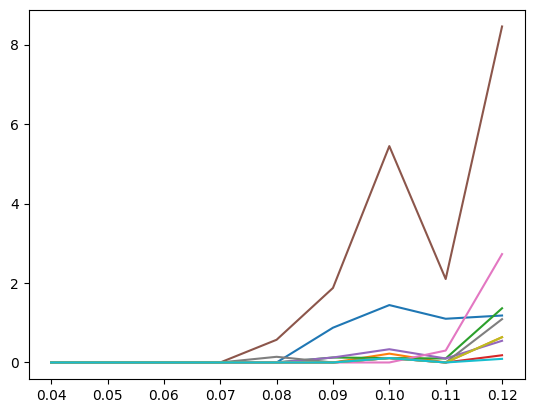

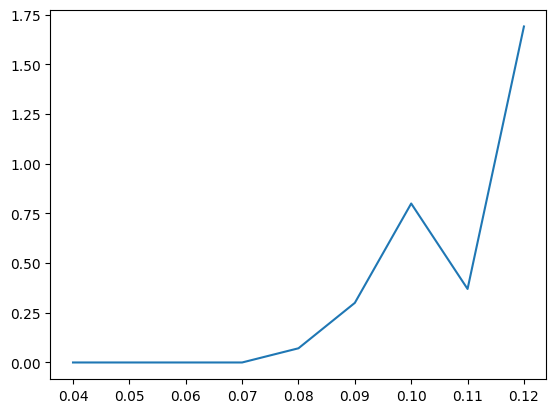

In [3]:
t = np.linspace(0.04, 0.12, 9)
for i in range(10):
  plt.plot(t, errors100[i])
plt.show()

mean_errors100 = np.mean(errors100, axis=0)
plt.plot(t, mean_errors100)
plt.show()

In [4]:
# from a = 6/150 = 0.04 to a = 18/150 = 0.12
num_vectors = 18
vector_length = 150
errors150 = []

for _ in range(10):

  vectors150 = []
  for _ in range(num_vectors):
    vector = np.random.choice([-1, 1], vector_length)
    vectors150.append(vector)

  err150_1 = []

  for i in range(5,18):
    net = hopfield_net(150)
    net.learn(vectors150[:i])
    err = 0
    for j in range(i):
      result = net.asyn_test(vectors150[j],10000)
      err += np.sum(vectors150[j] != result)

    print(err/i/1.5)
    err150_1.append(err/i/1.5)

  errors150.append(err150_1)

0.0
0.0
0.0
0.0
0.07407407407407407
0.0
0.24242424242424243
0.2222222222222222
0.9743589743589743
1.7142857142857144
0.8444444444444444
1.6666666666666667
1.7254901960784315
0.0
0.0
0.0
0.0
0.0
0.0
0.06060606060606061
0.05555555555555555
0.05128205128205129
0.8571428571428572
2.444444444444444
3.1666666666666665
4.078431372549019
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.4102564102564103
0.09523809523809523
0.4444444444444444
1.1666666666666667
3.9607843137254903
0.0
0.0
0.0
0.0
0.0
0.0
0.06060606060606061
0.5
0.0
0.4285714285714286
0.7999999999999999
1.75
1.647058823529412
0.0
0.0
0.0
0.08333333333333333
0.0
0.13333333333333333
0.6060606060606061
0.16666666666666666
0.358974358974359
2.3333333333333335
1.1111111111111112
2.125
2.2745098039215685
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.05555555555555555
1.435897435897436
3.0952380952380953
3.244444444444444
3.25
4.235294117647059
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.25641025641025644
0.19047619047619047
0.2222222222222222
0.875
2.1960784313725488
0.0
0.0
0

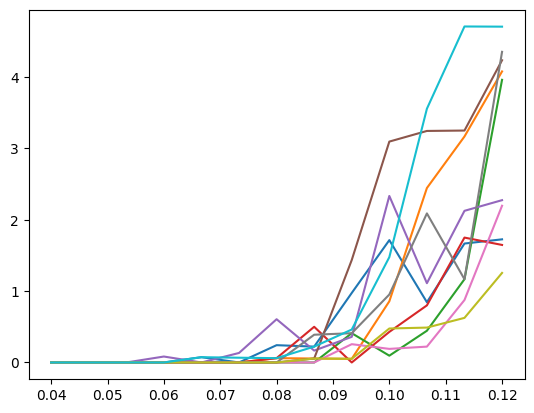

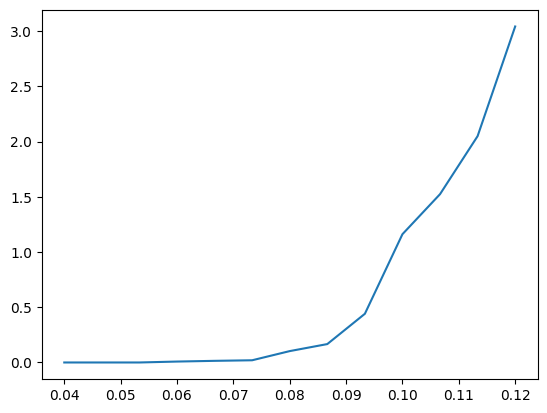

In [5]:
t = np.linspace(0.04, 0.12, 13)
for i in range(10):
  plt.plot(t, errors150[i])
plt.show()

mean_errors150 = np.mean(errors150, axis=0)
plt.plot(t, mean_errors150)
plt.show()

In [8]:
# from a = 8/200 = 0.04 to a = 24/200 = 0.12
num_vectors = 24
vector_length = 200
errors200 = []

for _ in range(10):

  vectors200 = []
  for _ in range(num_vectors):
    vector = np.random.choice([-1, 1], vector_length)
    vectors200.append(vector)

  err200_1 = []

  for i in range(7,24):
    net = hopfield_net(200)
    net.learn(vectors200[:i])
    err = 0
    for j in range(i):
      result = net.asyn_test(vectors200[j],10000)
      err += np.sum(vectors200[j] != result)

    print(err/i/2)
    err200_1.append(err/i/2)

  errors200.append(err200_1)

0.0
0.0
0.0
0.0
0.0
0.0
0.07692307692307693
0.03571428571428571
0.4
0.40625
0.3235294117647059
3.111111111111111
2.289473684210526
2.275
4.166666666666667
7.568181818181818
7.478260869565218
0.0
0.0
0.0
0.0
0.0
0.0
0.038461538461538464
0.03571428571428571
0.2
0.0625
0.3235294117647059
0.2777777777777778
0.34210526315789475
1.05
4.119047619047619
4.409090909090909
9.782608695652174
0.0
0.0
0.0
0.0
0.045454545454545456
0.0
0.038461538461538464
0.21428571428571427
0.5
0.0625
0.11764705882352941
0.3333333333333333
0.6052631578947368
0.575
2.3333333333333335
1.7954545454545454
2.739130434782609
0.0
0.0
0.0
0.0
0.045454545454545456
0.125
0.15384615384615385
0.07142857142857142
0.3
0.40625
0.35294117647058826
0.1388888888888889
0.5
1.025
3.6666666666666665
2.7045454545454546
5.413043478260869
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.03333333333333333
0.21875
0.11764705882352941
0.5277777777777778
0.631578947368421
1.95
2.142857142857143
3.227272727272727
7.3478260869565215
0.0
0.0
0.0
0.0
0.0
0.0416

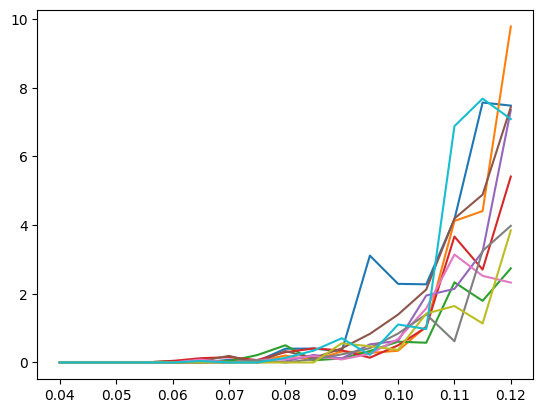

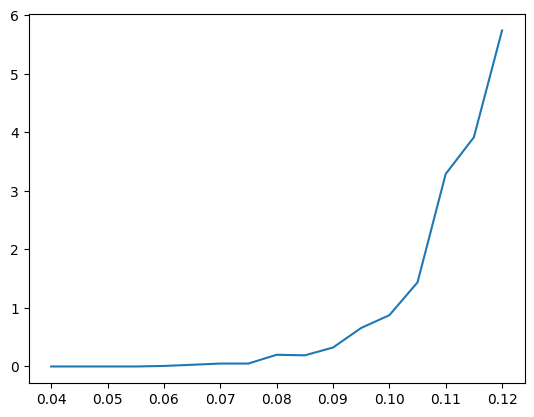

In [9]:
t = np.linspace(0.04, 0.12, 17)
for i in range(10):
  plt.plot(t, errors200[i])
plt.show()

mean_errors200 = np.mean(errors200, axis=0)
plt.plot(t, mean_errors200)
plt.show()

In [10]:
# from a = 10/250 = 0.04 to a = 30/250 = 0.12
num_vectors = 30
vector_length = 250
errors250 = []

for _ in range(10):

  vectors250 = []
  for _ in range(num_vectors):
    vector = np.random.choice([-1, 1], vector_length)
    vectors250.append(vector)

  err250_1 = []

  for i in range(9,30):
    net = hopfield_net(250)
    net.learn(vectors250[:i])
    err = 0
    for j in range(i):
      result = net.asyn_test(vectors250[j],10000)
      err += np.sum(vectors250[j] != result)

    print(err/i/2.5)
    err250_1.append(err/i/2.5)

  errors250.append(err250_1)

0.0
0.0
0.0
0.0
0.0
0.14285714285714285
0.26666666666666666
0.125
0.49411764705882355
0.28888888888888886
0.9052631578947368
0.58
0.6095238095238095
2.5272727272727273
1.2173913043478262
1.45
6.976000000000001
4.569230769230769
9.437037037037037
7.871428571428571
11.586206896551724
0.0
0.0
0.0
0.0
0.0
0.02857142857142857
0.05333333333333333
0.25
0.09411764705882353
0.6222222222222222
0.4842105263157895
1.7600000000000002
2.2095238095238097
1.4
3.252173913043478
7.866666666666667
9.312000000000001
13.369230769230768
12.666666666666668
14.228571428571428
18.924137931034483
0.0
0.0
0.0
0.0
0.03076923076923077
0.02857142857142857
0.026666666666666665
0.1
0.047058823529411764
0.2
0.5473684210526316
0.78
0.5333333333333333
1.5818181818181818
1.8434782608695652
1.85
2.976
4.4
4.948148148148148
5.8
8.593103448275862
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.05
0.023529411764705882
0.11111111111111112
0.23157894736842105
0.26
0.43809523809523815
0.5454545454545454
0.9217391304347826
1.2666666666666666
1.93

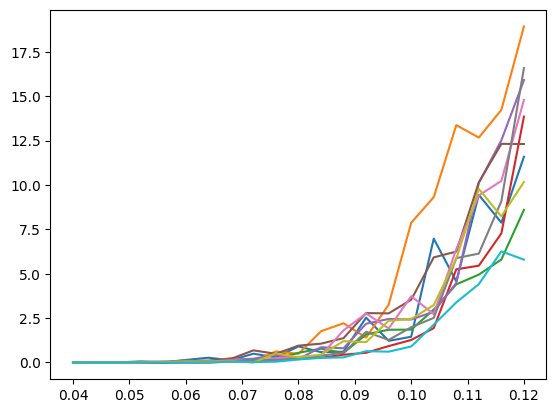

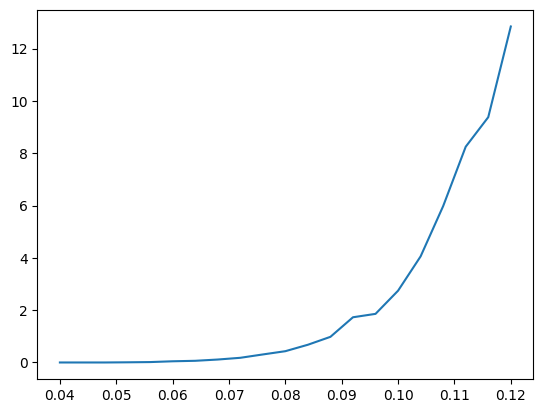

In [11]:
t = np.linspace(0.04, 0.12, 21)
for i in range(10):
  plt.plot(t, errors250[i])
plt.show()

mean_errors250 = np.mean(errors250, axis=0)
plt.plot(t, mean_errors250)
plt.show()

In [12]:
# from a = 12/300 = 0.04 to a = 36/300 = 0.12
num_vectors = 36
vector_length = 300
errors300 = []

for _ in range(10):

  vectors300 = []
  for _ in range(num_vectors):
    vector = np.random.choice([-1, 1], vector_length)
    vectors300.append(vector)

  err300_1 = []

  for i in range(11,36):
    net = hopfield_net(300)
    net.learn(vectors300[:i])
    err = 0
    for j in range(i):
      result = net.asyn_test(vectors300[j],10000)
      err += np.sum(vectors300[j] != result)

    print(err/i/3)
    err300_1.append(err/i/3)

  errors300.append(err300_1)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.018518518518518517
0.08771929824561403
0.13333333333333333
0.19047619047619047
0.22727272727272727
0.31884057971014496
0.8194444444444445
0.38666666666666666
1.6923076923076923
1.962962962962963
5.416666666666667
8.597701149425287
8.422222222222222
6.387096774193548
11.625
19.717171717171716
19.04901960784314
27.304761904761904
0.0
0.0
0.0
0.0
0.022222222222222223
0.0
0.05882352941176471
0.037037037037037035
0.07017543859649122
0.049999999999999996
0.15873015873015872
0.12121212121212122
0.391304347826087
0.4583333333333333
0.7466666666666667
0.9358974358974358
2.54320987654321
1.9642857142857144
3.9885057471264367
7.855555555555555
6.043010752688172
12.5
13.272727272727273
21.098039215686274
19.8
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.018518518518518517
0.0
0.049999999999999996
0.07936507936507936
0.10606060606060606
0.13043478260869565
0.2777777777777778
1.0666666666666667
0.7692307692307692
0.9876543209876543
1.2380952380952381
1.0574712643678161
2.5555555555555

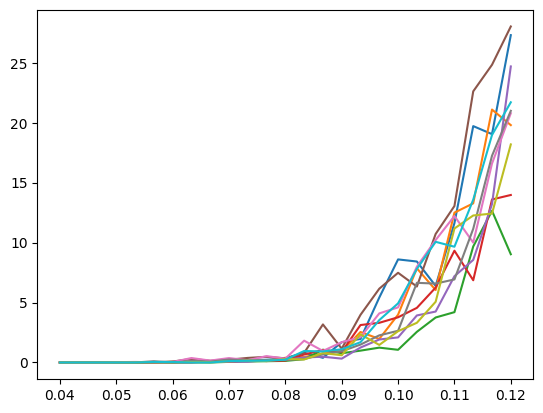

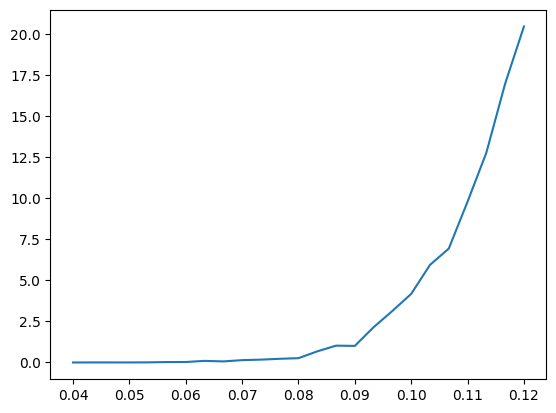

In [13]:
t = np.linspace(0.04, 0.12, 25)
for i in range(10):
  plt.plot(t, errors300[i])
plt.show()

mean_errors300 = np.mean(errors300, axis=0)
plt.plot(t, mean_errors300)
plt.show()

In [14]:
# from a = 14/350 = 0.04 to a = 42/350 = 0.12
num_vectors = 42
vector_length = 350
errors350 = []

for _ in range(10):

  vectors350 = []
  for _ in range(num_vectors):
    vector = np.random.choice([-1, 1], vector_length)
    vectors350.append(vector)

  err350_1 = []

  for i in range(13,42):
    net = hopfield_net(350)
    net.learn(vectors350[:i])
    err = 0
    for j in range(i):
      result = net.asyn_test(vectors350[j],10000)
      err += np.sum(vectors350[j] != result)

    print(err/i/3.5)
    err350_1.append(err/i/3.5)

  errors350.append(err350_1)

0.0
0.0
0.0
0.0
0.0
0.031746031746031744
0.03007518796992481
0.09999999999999999
0.12244897959183673
0.2077922077922078
0.12422360248447205
0.27380952380952384
0.49142857142857144
1.043956043956044
2.6455026455026456
4.755102040816326
3.655172413793103
7.771428571428571
6.175115207373272
12.178571428571429
14.259740259740258
15.210084033613445
16.39183673469388
19.42063492063492
23.82239382239382
20.30075187969925
24.776556776556777
32.66428571428572
32.5993031358885
0.0
0.0
0.0
0.0
0.0
0.015873015873015872
0.03007518796992481
0.07142857142857142
0.09523809523809523
0.3116883116883117
0.13664596273291926
0.21428571428571427
0.5714285714285714
0.32967032967032966
0.4973544973544973
1.2142857142857142
0.6798029556650247
0.8476190476190476
1.152073732718894
2.732142857142857
3.41991341991342
5.831932773109243
10.155102040816328
11.746031746031747
11.55984555984556
24.86466165413534
21.23076923076923
26.72142857142857
30.132404181184672
0.0
0.0
0.0
0.0
0.0
0.031746031746031744
0.0601503759

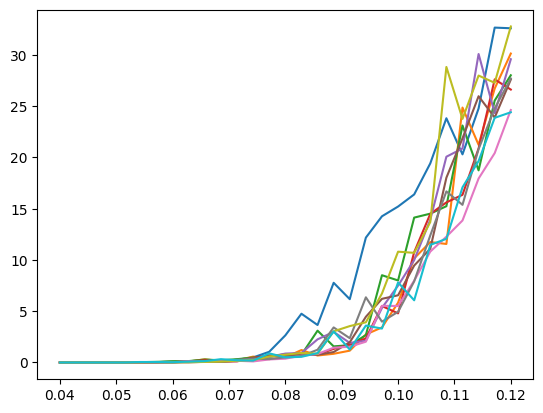

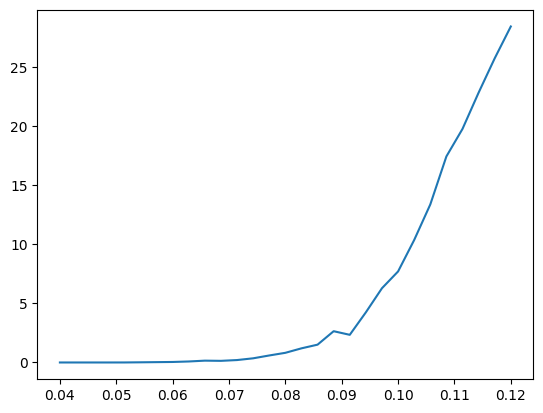

In [15]:
t = np.linspace(0.04, 0.12, 29)
for i in range(10):
  plt.plot(t, errors350[i])
plt.show()

mean_errors350 = np.mean(errors350, axis=0)
plt.plot(t, mean_errors350)
plt.show()

In [16]:
# from a = 16/400 = 0.04 to a = 48/400 = 0.12
num_vectors = 48
vector_length = 400
errors400 = []

for _ in range(10):

  vectors400 = []
  for _ in range(num_vectors):
    vector = np.random.choice([-1, 1], vector_length)
    vectors400.append(vector)

  err400_1 = []

  for i in range(15,48):
    net = hopfield_net(400)
    net.learn(vectors400[:i])
    err = 0
    for j in range(i):
      result = net.asyn_test(vectors400[j], 10000)
      err += np.sum(vectors400[j] != result)

    print(err/i/4)
    err400_1.append(err/i/4)

  errors400.append(err400_1)

0.0
0.0
0.0
0.0
0.0
0.025
0.011904761904761904
0.022727272727272728
0.06521739130434782
0.125
0.11
0.14423076923076922
0.21296296296296297
0.4642857142857143
0.4224137931034483
0.48333333333333334
0.8951612903225806
0.71875
1.0833333333333333
1.1911764705882353
2.1714285714285713
4.340277777777778
8.925675675675675
6.7631578947368425
9.333333333333334
14.93125
19.573170731707318
19.625
27.348837209302324
26.789772727272727
27.766666666666666
30.47826086956522
32.59574468085106
0.0
0.0
0.0
0.013888888888888888
0.02631578947368421
0.0
0.047619047619047616
0.056818181818181816
0.09782608695652174
0.15625
0.21
0.2403846153846154
0.3425925925925926
0.35714285714285715
0.3879310344827586
0.7166666666666667
0.7096774193548387
1.203125
2.712121212121212
3.0220588235294117
1.8285714285714285
3.951388888888889
7.891891891891892
8.888157894736842
11.5
14.88125
25.48780487804878
23.113095238095237
27.47093023255814
29.795454545454547
34.21666666666667
32.61413043478261
38.829787234042556
0.0
0.0
0

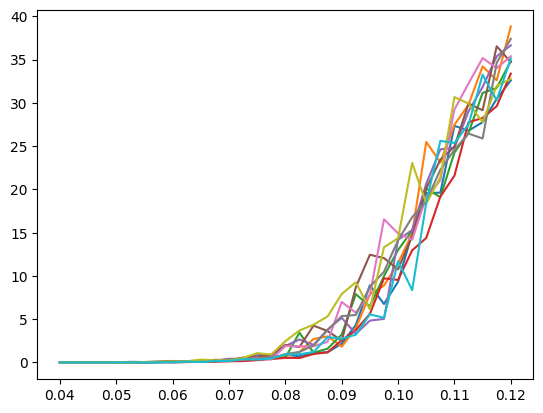

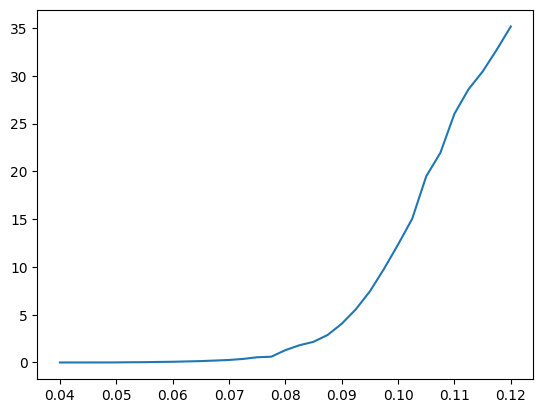

In [18]:
t = np.linspace(0.04, 0.12, 33)
for i in range(10):
  plt.plot(t, errors400[i])
plt.show()

mean_errors400 = np.mean(errors400, axis=0)
plt.plot(t, mean_errors400)
plt.show()

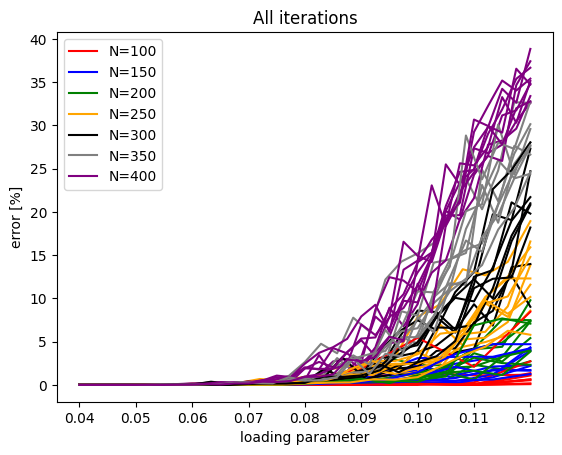

In [28]:
for i in range(10):
  plt.plot(np.linspace(0.04, 0.12, 9), errors100[i],color='red')
  plt.plot(np.linspace(0.04, 0.12, 13), errors150[i], color = 'blue')
  plt.plot(np.linspace(0.04, 0.12, 17), errors200[i], color='green')
  plt.plot(np.linspace(0.04, 0.12, 21), errors250[i], color='orange')
  plt.plot(np.linspace(0.04, 0.12, 25), errors300[i], color='black')
  plt.plot(np.linspace(0.04, 0.12, 29), errors350[i], color='grey')
  plt.plot(np.linspace(0.04, 0.12, 33), errors400[i], color='purple')

plt.title("All iterations")
plt.xlabel('loading parameter')
plt.ylabel('error [%]')
plt.legend(['N=100', 'N=150', 'N=200', 'N=250', 'N=300', 'N=350', 'N=400'])
plt.show()

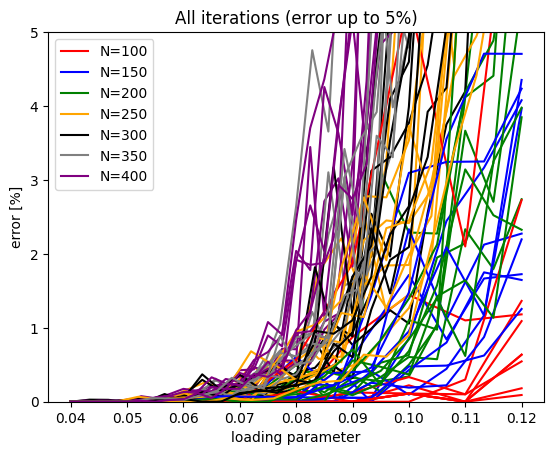

In [29]:
for i in range(10):
  plt.plot(np.linspace(0.04, 0.12, 9), errors100[i],color='red')
  plt.plot(np.linspace(0.04, 0.12, 13), errors150[i], color = 'blue')
  plt.plot(np.linspace(0.04, 0.12, 17), errors200[i], color='green')
  plt.plot(np.linspace(0.04, 0.12, 21), errors250[i], color='orange')
  plt.plot(np.linspace(0.04, 0.12, 25), errors300[i], color='black')
  plt.plot(np.linspace(0.04, 0.12, 29), errors350[i], color='grey')
  plt.plot(np.linspace(0.04, 0.12, 33), errors400[i], color='purple')

plt.title("All iterations (error up to 5%)")
plt.ylim(0, 5)
plt.xlabel('loading parameter')
plt.ylabel('error [%]')
plt.legend(['N=100', 'N=150', 'N=200', 'N=250', 'N=300', 'N=350', 'N=400'])
plt.show()

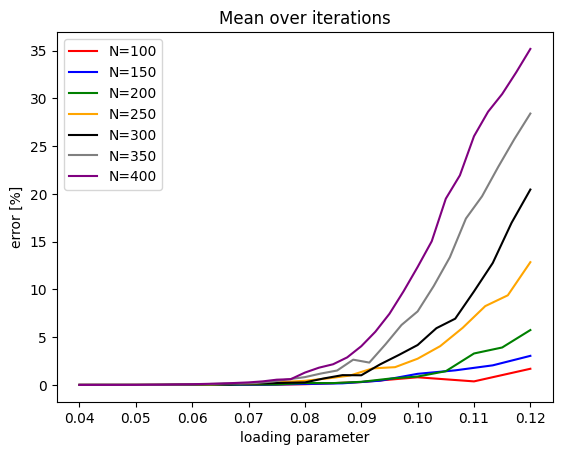

In [30]:
plt.plot(np.linspace(0.04, 0.12, 9), mean_errors100,color='red')
plt.plot(np.linspace(0.04, 0.12, 13), mean_errors150, color = 'blue')
plt.plot(np.linspace(0.04, 0.12, 17), mean_errors200, color='green')
plt.plot(np.linspace(0.04, 0.12, 21), mean_errors250, color='orange')
plt.plot(np.linspace(0.04, 0.12, 25), mean_errors300, color='black')
plt.plot(np.linspace(0.04, 0.12, 29), mean_errors350, color='grey')
plt.plot(np.linspace(0.04, 0.12, 33), mean_errors400, color='purple')

plt.title("Mean over iterations")
plt.xlabel('loading parameter')
plt.ylabel('error [%]')
plt.legend(['N=100', 'N=150', 'N=200', 'N=250', 'N=300', 'N=350', 'N=400'])
plt.show()

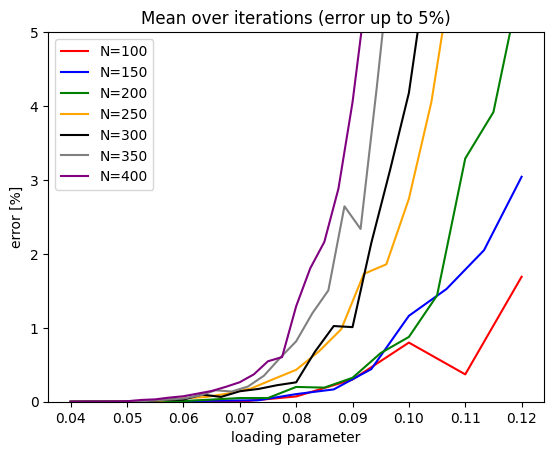

In [31]:
plt.plot(np.linspace(0.04, 0.12, 9), mean_errors100,color='red')
plt.plot(np.linspace(0.04, 0.12, 13), mean_errors150, color = 'blue')
plt.plot(np.linspace(0.04, 0.12, 17), mean_errors200, color='green')
plt.plot(np.linspace(0.04, 0.12, 21), mean_errors250, color='orange')
plt.plot(np.linspace(0.04, 0.12, 25), mean_errors300, color='black')
plt.plot(np.linspace(0.04, 0.12, 29), mean_errors350, color='grey')
plt.plot(np.linspace(0.04, 0.12, 33), mean_errors400, color='purple')

plt.ylim(0,5)
plt.title("Mean over iterations (error up to 5%)")
plt.xlabel('loading parameter')
plt.ylabel('error [%]')
plt.legend(['N=100', 'N=150', 'N=200', 'N=250', 'N=300', 'N=350', 'N=400'])
plt.show()

In [ ]:
# from a = 40/500 = 0.08 to a = 60/500 = 0.12
num_vectors = 60
vector_length = 500
errors500 = []

for _ in range(10):

  vectors500 = []
  for _ in range(num_vectors):
    vector = np.random.choice([-1, 1], vector_length)
    vectors500.append(vector)

  err500_1 = []

  for i in range(39, 60):
    net = hopfield_net(500)
    net.learn(vectors500[:i])
    err = 0
    for j in range(i):
      result = net.asyn_test(vectors500[j], 10000)
      err += np.sum(vectors500[j] != result)

    print(err/i/5)
    err500_1.append(err/i/5)

  errors500.append(err500_1)

2.7282051282051283
2.56
4.195121951219512
10.72857142857143
14.362790697674418
12.01818181818182
17.45777777777778
28.85217391304348
24.70212765957447
26.575
31.551020408163264
34.772000000000006
32.015686274509804
41.676923076923075
40.30566037735849
39.12222222222222
40.709090909090904
42.996428571428574
40.91578947368421
42.04137931034482
42.67457627118644
2.594871794871795
2.125
3.6926829268292685
5.385714285714285
6.665116279069767
9.513636363636364
9.92
21.456521739130434
20.646808510638298
23.595833333333335
31.3265306122449
32.572
29.992156862745098
35.04230769230769
34.95471698113208
38.351851851851855
40.014545454545456
43.0
40.449122807017545
41.08965517241379
42.11864406779661
1.5794871794871796
1.985
3.5609756097560976
4.266666666666667
7.888372093023255
12.181818181818182
17.74222222222222
20.12608695652174
24.03404255319149
22.104166666666664
25.142857142857142
26.572000000000003
32.07058823529412
35.003846153846155
33.79622641509434
39.007407407407406
39.82909090909091


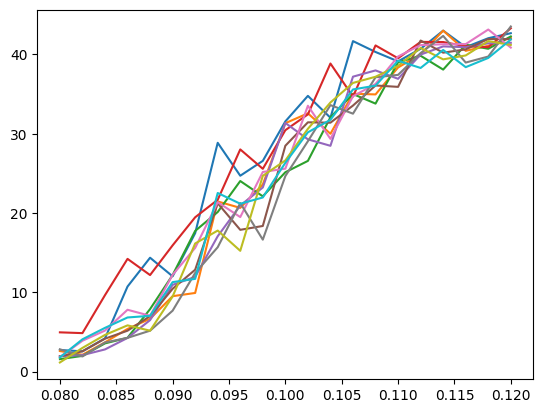

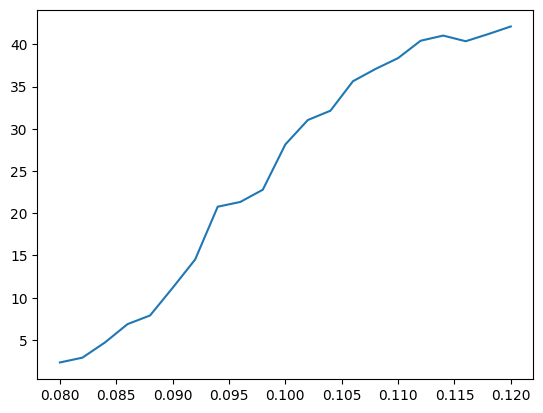

In [ ]:
t = np.linspace(0.08, 0.12, 21)
for i in range(10):
  plt.plot(t, errors500[i])
plt.show()

mean_errors500 = np.mean(errors500, axis=0)
plt.plot(t, mean_errors500)
plt.show()

In [ ]:
# from a = 40/800 = 0.05 to a = 80/800 = 0.1
num_vectors = 80
vector_length = 800
errors800 = []

for _ in range(5):

  vectors800 = []
  for _ in range(num_vectors):
    vector = np.random.choice([-1, 1], vector_length)
    vectors800.append(vector)

  err800_1 = []

  for i in range(40, 80):
    net = hopfield_net(800)
    net.learn(vectors800[:i])
    err = 0
    for j in range(i):
      result = net.asyn_test(vectors800[j], 200)
      err += np.sum(vectors800[j] != result)

    print(err/i/8)
    err800_1.append(err/i/8)

  errors800.append(err800_1)

0.140625
0.1951219512195122
0.2113095238095238
0.23546511627906977
0.3352272727272727
0.40555555555555556
0.4891304347826087
0.6063829787234043
0.7708333333333334
0.7397959183673469
1.1125
1.2450980392156863
2.125


In [ ]:
t = np.linspace(0.05, 0.1, 40)
for i in range(5):
  plt.plot(t, errors800[i])
plt.show()

mean_errors800 = np.mean(errors800, axis=0)
plt.plot(t, mean_errors800)
plt.show()

In [ ]:
# from a = 50/1000 = 0.05 to a = 100/1000 = 0.1
num_vectors = 100
vector_length = 1000
errors1000 = []

for _ in range(5):

  vectors1000 = []
  for _ in range(num_vectors):
    vector = np.random.choice([-1, 1], vector_length)
    vectors1000.append(vector)

  err1000_1 = []

  for i in range(50, 100):
    net = hopfield_net(1000)
    net.learn(vectors1000[:i])
    err = 0
    for j in range(i):
      result = net.asyn_test(vectors1000[j], 300)
      err += np.sum(vectors1000[j] != result)

    print(err/i/10)
    err1000_1.append(err/i/10)

  errors1000.append(err1000_1)

In [ ]:
t = np.linspace(0.05, 0.1, 50)
for i in range(5):
  plt.plot(t, errors1000[i])
plt.show()

mean_errors1000 = np.mean(errors1000, axis=0)
plt.plot(t, mean_errors1000)
plt.show()